In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy import integrate
from scipy import interpolate

In [2]:
#path = "/Users/argelia/Desktop/RC_lBS/Data/Blok_McGaugh_Rubin_2001/"
#data = np.loadtxt(path+"ESO3020120.dat")
path="/Users/namh2/Downloads/anterior/ajusteTOV/"
data=np.loadtxt(path+"datos.txt")

In [3]:
RCr_data = np.array([row[1] for row in data])# galactocentric distance [kpc]
RCv_data = np.array([row[5] for row in data])# rotation velocity [km/s]
RCev_data = np.array([row[6] for row in data])# error in rotation velocity [km/s]

Text(0.5, 0, 'r[kpc]')

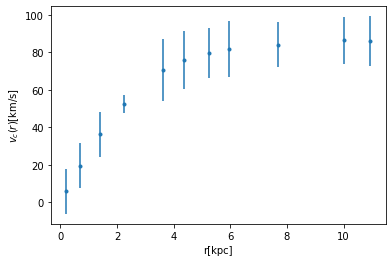

In [4]:
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
plt.ylabel(r'$v_{c}(r)$[km/s]')
plt.xlabel("r[kpc]")

In [40]:
def Integrate(func,x0,y0,x,h):
    # Finds value of y for a given x using step size h 
    # and initial value y0 at x0.
    def RK4(func,x0,y0,h):
        K0 = h*func(x0,y0)
        K1 = h*func(x0 + 0.5*h, y0 + 0.5*K0)
        K2 = h*func(x0 + 0.5*h, y0 + 0.5*K1)
        K3 = h*func(x0 + h, y0 + K2)
        return (K0 + 2.*K1 + 2.*K2 + K3)/6.
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    #while x0 < x:
    while y0[1] > 0.000001*x:
         # Count number of iterations using step size or
        #h = min(h,x - x0)# step height h
        y0 = y0 + RK4(func,x0,y0,h)#update next value of y
        x0 = x0 + h#update next value of x
        X.append(x0)
        Y.append(y0)
    return np.array(X),np.array(Y)

In [41]:
def rhs(x,y):
    dy=np.zeros(2)
    dy[0]=3.*x**2*(y[1]/K)**(1./g)
    dy[1]=-Gs*y[0]/x**2*(y[1]/K)**(1./g)
    return dy

In [42]:
Gs=4.785*10**(-7)
G=4.258*10**(4)
x0=0.0001
y0=np.zeros(2)
y0[0]=0.
h=0.01

In [52]:
K=1*10**(-6) #Mejor valor de p_0 modificar K
g=1.7
#g=2.1 #
#p_0=1.26*10**(-10)
#p_0=4.7*10**(-10) #realizar un mapeo, minimizar Xi^2
#p_0=4.8*10**(-10)
#p_0=4.9*10**(-10)
#p_0=5.552*10**(-10)
p_0min=5.55*10**(-10)
p_0max=5.75*10**(-10)
p_0=np.linspace(p_0min,p_0max,10)
print(p_0)''

[5.55000000e-10 5.57222222e-10 5.59444444e-10 5.61666667e-10
 5.63888889e-10 5.66111111e-10 5.68333333e-10 5.70555556e-10
 5.72777778e-10 5.75000000e-10]


In [44]:
y0[1]=p_0
x=100
X,Y=Integrate(rhs,x0,y0,p_0,h)

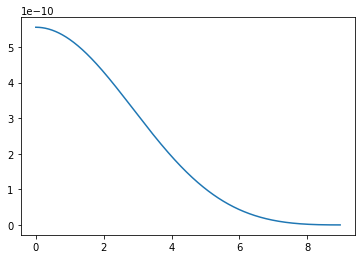

In [45]:
plt.plot(X,Y[:,1])

In [46]:
def model(data):
    V = []
    RC=np.sqrt(G*Y[:,0]/X)
    Int_l = interpolate.interp1d(X,RC)#,fill_value='extrapolate')
    for i in range(len(data)):
        if data[i] < X[-1]:
            v=Int_l(data[i])
            V.append(v)
        else:
            v=np.sqrt(G*Y[:,0][-1]/(data[i]))
            V.append(v)
    return V

In [47]:
V=np.zeros(len(RCr_data))
V=model(RCr_data)
print(V)
Xi=np.sum((RCv_data-V)**(2.)/(RCev_data)**2)
print(Xi)

[array(4.54906736), array(15.84139513), array(31.16431539), array(48.18654218), array(71.19342359), array(80.25791689), array(88.25405745), array(91.915325), array(92.60513775), 82.93144131277325, 79.25235089040942]
2.9388141393440885


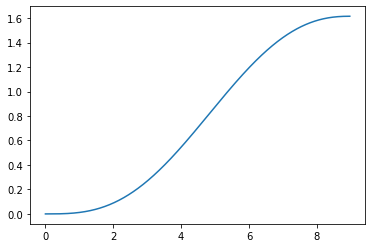

In [48]:
plt.plot(X,Y[:,0])

In [49]:
RC=np.sqrt(G*Y[:,0]/X)

(-1.0, 120.0)

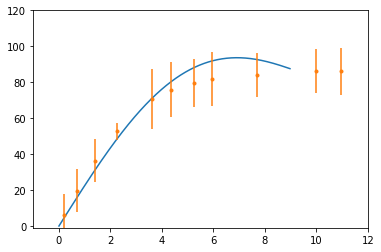

In [50]:
plt.plot(X,RC)
#plt.plot(RCr_data,V)
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
plt.xlim(-1,12)
plt.ylim(-1,120)

In [ ]:
for p_0 in range(len(p_0))